# Maps of Measured and Calculated Hysteresis

### Import Packages

In [2]:
import climlab
import numpy as np
import phys
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm

### Import Calculated Heights file from Cluster

In [3]:
path = './Data/'

ts_2m = xr.open_dataset(path + 'ts_2m.nc', decode_times=False)
temp = xr.open_dataset(path + 'temp.nc', decode_times=False)
olrs = xr.open_dataset(path + 'olrs_ltmm.nc', decode_times=False)
heights_calc_raw = xr.open_dataset(path + 'heights_calculated.nc', decode_times=False)
heights_meas_raw = xr.open_dataset(path + 'heights_measured.nc', decode_times=False)

lats = temp.lat.values
lons = temp.lon.values
lon_long = temp.lon.values

heights_calc = np.zeros((len(lats), len(lons)))
heights_calc, lons = add_cyclic_point(heights_calc, coord=lons)
lons = temp.lon.values

heights_meas = np.zeros((len(lats), len(lons)))
heights_meas, lons = add_cyclic_point(heights_meas, coord=lons)
lons = temp.lon.values

heights_frac = np.zeros((len(lats), len(lons)))
heights_frac, lon_long = add_cyclic_point(heights_frac, coord=lon_long)

for i in range(len(lats)):
    for j in range(len(lons)):
        heights_calc[i,j] = heights_calc_raw.height.values[i,j]
        heights_meas[i,j] = heights_meas_raw.height.values[i,j]
        heights_frac[i,j] = heights_meas_raw.height.values[i,j] * 100 / olrs.sel(lat=lats[i], lon=lons[j]).olr.values[0]

heights_calc[:,len(lons)] = heights_calc[:,0]
heights_calc = np.flip(heights_calc, axis=0)
    
heights_meas[:,len(lons)] = heights_meas[:,0]
#heights_meas = np.flip(heights_meas, axis=0)

C:\Users\richa\Anaconda3\lib\site-packages\cartopy\util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


### Plotting Observed Hysteresis

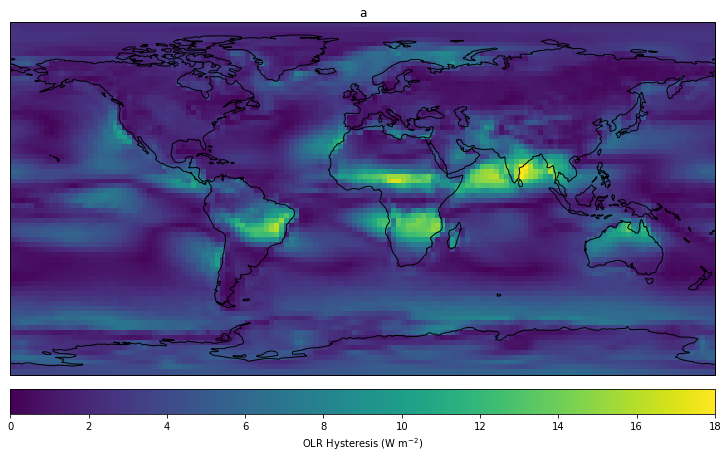

In [24]:
widths = [1]
fig = plt.figure(figsize=(10,7),constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths)    

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax1.coastlines()
C1 = ax1.pcolor(lon_long, lats, heights_meas, transform=ccrs.PlateCarree())
#if samescale:
C1.set_clim(vmin=0,vmax=18)
ax1.set_title('a')
#ax1.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax1.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax1.xaxis.set_major_formatter(lon_formatter)
#ax1.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C1, ax=ax1, label='OLR Hysteresis (W m$^{-2}$)',fraction=0.3, orientation="horizontal")

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/Cluster/'
#plt.savefig(path + 'Calculated Hysteresis single.png', bbox_inches='tight')

### Fractional Hysteresis

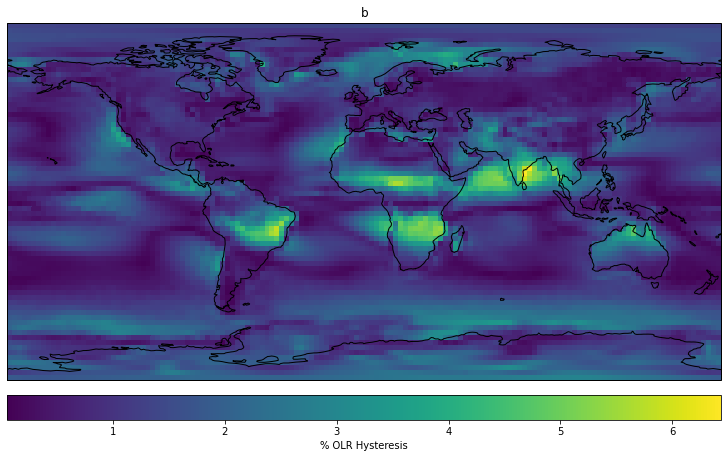

In [22]:
widths = [1]
fig = plt.figure(figsize=(10,7),constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths)    

#maxheight = 18

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax1.coastlines()
C1 = ax1.pcolor(lon_long, lats, heights_frac, transform=ccrs.PlateCarree())
#if samescale:
#C1.set_clim(vmin=0,vmax=maxheight)
ax1.set_title('b')
#ax1.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax1.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax1.xaxis.set_major_formatter(lon_formatter)
#ax1.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C1, ax=ax1, label='% OLR Hysteresis',fraction=0.3, orientation="horizontal")

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/'
#plt.savefig(path + 'Fractional Calculated Hysteresis single.png', bbox_inches='tight')

### Calculated Hysteresis

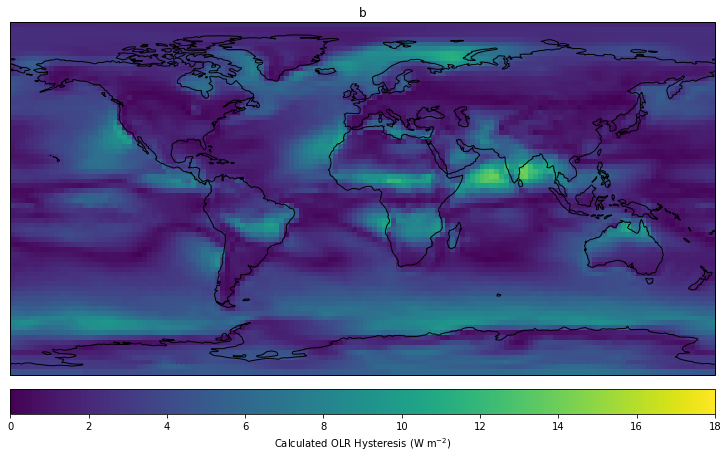

In [28]:
# --------------------------------
# Plotting the Reanalysis OLR Map
# --------------------------------

widths = [1,1]
fig = plt.figure(figsize=(10,7),constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=1)    

ax2 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax2.coastlines()
C2 = ax2.pcolor(lon_long, lats, heights_calc, transform=ccrs.PlateCarree())
#if samescale:
C2.set_clim(vmin=0,vmax=18)
ax2.set_title('b')
#ax2.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax2.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax2.xaxis.set_major_formatter(lon_formatter)
#ax2.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C2, ax=ax2, label='Calculated OLR Hysteresis (W m$^{-2}$)',fraction=0.3, orientation="horizontal")

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/'
#plt.savefig(path + 'Calc Hysteresis.png', bbox_inches='tight')

### Difference Between Calculated and Measured Hysteresis

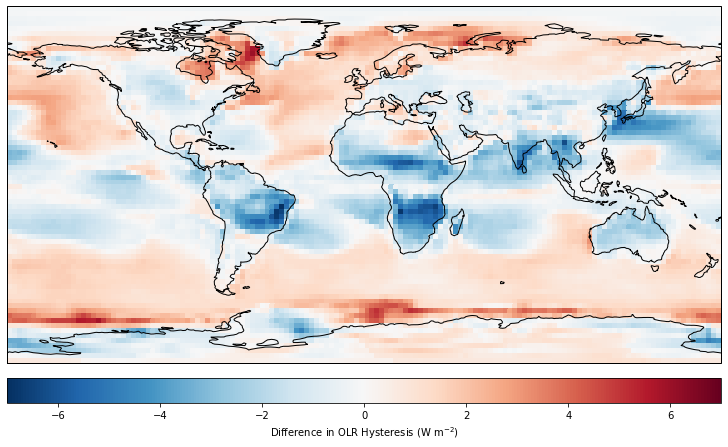

In [29]:
diferencemap = heights_meas.copy()

for i in range(len(heights_meas[:,0])):
    for j in range(len(heights_meas[0,:])):
        diferencemap[i,j] = 0
        diferencemap[i,j] = heights_calc[i,j] - heights_meas[i,j]

widths = [1,1]
fig = plt.figure(figsize=(10,7),constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=1)    

ax2 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax2.coastlines()
C2 = ax2.pcolor(lon_long, lats, diferencemap, transform=ccrs.PlateCarree(), cmap=cm.RdBu_r)
#if samescale:
C2.set_clim(vmin=-7,vmax=7)
#ax2.set_title('Difference')
#ax2.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax2.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax2.xaxis.set_major_formatter(lon_formatter)
#ax2.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C2, ax=ax2, label='Difference in OLR Hysteresis (W m$^{-2}$)',fraction=0.3, orientation="horizontal")

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/'
#plt.savefig(path + 'Diff Hysteresis.png', bbox_inches='tight')

### All sky Hysteresis

In [1]:
olrs

NameError: name 'olrs' is not defined

In [30]:
path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Data/'
olr_raw = xr.open_dataset(path + 'ulwrf.ntat.mon.ltm.nc')

In [35]:
from scipy import interpolate

def regrid_xy(x0,y0,z0,x1,y1,method='linear',do_flip=True):
    f = interpolate.interp2d(x0, y0, z0, kind=method)
    z1 = f(x1, y1)
    
    # careful: I think this is necessary if lat/lon aren't monotonically increasing!
    if do_flip: z1 = np.flipud(z1)

    return z1

def regrid_3d(time,x0,y0,z0,x1,y1,method='cubic',do_flip=True):

    z1 = np.zeros( (len(time),len(y1),len(x1)) )
    z1[:] = np.nan
    
    #print("INTERPOLATING 3d...")
    for i in range(len(time)):
        z1[i,...] = regrid_xy(x0,y0,z0[i,:,:],x1,y1)

    #print("... DONE.")
 
    return z1

In [36]:
olrs_allsky = regrid_3d(olr_raw.time.values,olr_raw.lon,olr_raw.lat,olr_raw.ulwrf.values,temp.lon,temp.lat)

In [37]:
olrs_allsky

array([[[160.88401794, 161.08908081, 161.04917399, ..., 160.72166443,
         160.78167725, 160.82583618],
        [160.8113841 , 160.9729065 , 160.89827505, ..., 160.6790134 ,
         160.74828818, 160.77248101],
        [160.95777906, 161.08325832, 160.98949397, ..., 160.77751269,
         160.88177132, 160.91892728],
        ...,
        [205.87157594, 204.62682841, 203.12302709, ..., 207.69293281,
         207.22299461, 206.64268974],
        [203.75523056, 203.32946536, 202.91118636, ..., 204.54305517,
         204.29860214, 204.04088159],
        [202.74349976, 202.69510396, 202.78437805, ..., 203.06820679,
         202.92306519, 202.80246989]],

       [[164.05422974, 164.17169698, 164.11635844, ..., 164.15171814,
         164.14883931, 164.10052999],
        [164.14571858, 164.28172097, 164.20362736, ..., 164.07692944,
         164.14587077, 164.1534699 ],
        [164.67751033, 164.91591992, 164.84014068, ..., 164.1413822 ,
         164.3864424 , 164.55613038],
        ...,


In [31]:
olr_raw

<xarray.Dataset>
Dimensions:             (lat: 94, lon: 192, nbnds: 2, time: 12)
Coordinates:
  * lat                 (lat) float32 88.542 86.6531 ... -86.6531 -88.542
  * lon                 (lon) float32 0.0 1.875 3.75 ... 354.375 356.25 358.125
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    ulwrf               (time, lat, lon) float32 ...
    valid_yr_count      (time, lat, lon) float32 ...
Attributes:
    description:                    Data is from NMC initialized reanalysis\n...
    platform:                       Model
    Conventions:                    COARDS
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...
    history:                        Created 2011/07/12 by doMonthLTM\nConvert...
    title:                          monthly ltm ulwrf.ntat from the NCEP Rean...
    dataset_title:              

In [105]:
heights_calc_raw = xr.open_dataset('Data/Cluster/Combined_data.nc')

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Data/'
ts_2m = xr.open_dataset(path + 'Cluster/ts_2m.nc', decode_times=False) # 2m Temperature dataset
temp = xr.open_dataset(path + 'Cluster/temp.nc', decode_times=False) # Air Temperature dataset

olr_raw = xr.open_dataset(path + 'ulwrf.ntat.mon.ltm.nc', decode_times=False)

olrs = df.regrid_3d(olr_raw.time.values,olr_raw.lon,olr_raw.lat,olr_raw.ulwrf.values,temp.lon,temp.lat)

lats = temp.lat.values
lons = temp.lon.values
lon_long = temp.lon.values

In [106]:
heights_calc = np.zeros((len(lats), len(lons)))
heights_calc, lons = add_cyclic_point(heights_calc, coord=lons)
lons = temp.lon.values

for i in range(len(lats)):
    for j in range(len(lons)):
        heights_calc[i,j] = heights_calc_raw.height.values[i,j]
        
months_olrs = []
for i in olr_raw.time.values:
    x = pd.to_datetime(i)
    months_olrs.append(x.month)

C:\Users\richa\Anaconda3\lib\site-packages\cartopy\util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


In [107]:
heights_calc[:,len(lons)] = heights_calc[:,0]
heights_calc = np.flip(heights_calc, axis=0)
    
heights = np.zeros((len(lats), len(lons)))
heights, lon_long = add_cyclic_point(heights, coord=lon_long)
lons = temp.lon.values

In [87]:
df.update_progress(0)
for i in range(len(lats)):
    for j in range(len(lons)):
        
        month_list = np.arange(1,13)
        ts_monav = list(ts_2m.sel(lat=lats[i], lon=lons[j]).air.values)

        heights[i,j] = df.PolyArea(ts_monav,list(olrs[:,i,j])) / (max(ts_monav) - min(ts_monav))
        
        df.update_progress(i/len(lats))
        print('Lat:', lats[i], 'Lon:', lons[j])
df.update_progress(1)

Progress: [####################] 100.0%


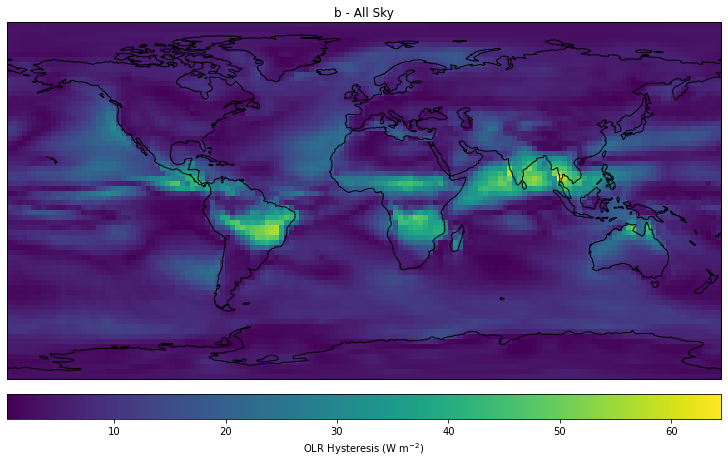

In [88]:
# --------------------------------
# Plotting the Reanalysis OLR Map
# --------------------------------

widths = [1]
fig = plt.figure(figsize=(10,7),constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths)    

#maxheight = 18

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax1.coastlines()
C1 = ax1.pcolor(lon_long, lats, heights, transform=ccrs.PlateCarree())
#if samescale:
#C1.set_clim(vmin=0,vmax=18)
ax1.set_title('b - All Sky')
#ax1.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax1.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax1.xaxis.set_major_formatter(lon_formatter)
#ax1.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C1, ax=ax1, label='OLR Hysteresis (W m$^{-2}$)',fraction=0.3, orientation="horizontal")

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/Cluster/'
#plt.savefig(path + 'all sky hysteresis.png', bbox_inches='tight')

# Fractional All Sky

In [108]:
heights_frac = np.zeros((len(lats), len(lons)))
lon2 = temp.lon.values
heights_frac, lon2 = add_cyclic_point(heights_frac, coord=lon2)
lons = temp.lon.values

In [109]:
df.update_progress(0)
for i in range(len(lats)):
    for j in range(len(lons)):
        
        month_list = np.arange(1,13)
        ts_monav = list(ts_2m.sel(lat=lats[i], lon=lons[j]).air.values)

        heights_frac[i,j] = ( df.PolyArea(ts_monav,list(olrs[:,i,j])) / (max(ts_monav) - min(ts_monav)) / np.mean(olrs[:,i,j]) ) * 100
        
        df.update_progress(i/len(lats))
        print('Lat:', lats[i], 'Lon:', lons[j])
df.update_progress(1)

Progress: [####################] 100.0%


In [144]:
np.amax(heights_frac)

26.893404609270938

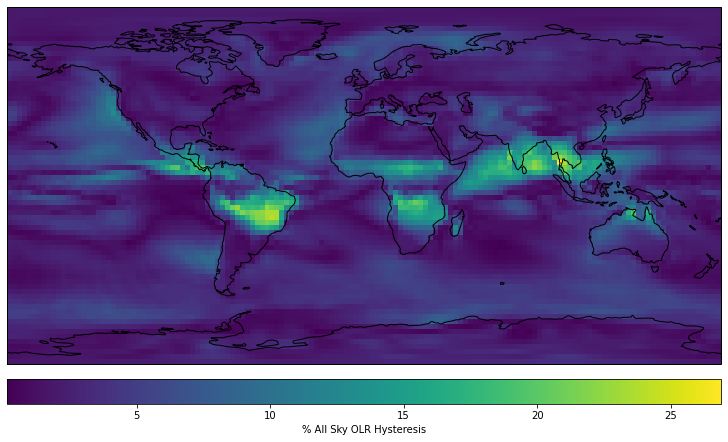

In [111]:
# --------------------------------
# Plotting the Reanalysis OLR Map
# --------------------------------

widths = [1]
fig = plt.figure(figsize=(10,7),constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths)    

#maxheight = 18

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax1.coastlines()
C1 = ax1.pcolor(lon_long, lats, heights_frac, transform=ccrs.PlateCarree())
#if samescale:
#C1.set_clim(vmin=0,vmax=18)
#ax1.set_title('b - All Sky')
#ax1.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax1.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax1.xaxis.set_major_formatter(lon_formatter)
#ax1.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C1, ax=ax1, label='% All Sky OLR Hysteresis',fraction=0.3, orientation="horizontal")

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/Cluster/'
#plt.savefig(path + 'all sky hysteresis fractional.png', bbox_inches='tight')

In [118]:
path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Data/'
olr_raw_clr = xr.open_dataset(path + 'NCEP Fluxes/csulf.ntat.mon.mean.nc')

In [127]:
olr_raw_clr.mean(dim='time').csulf.values.shape

(94, 192)

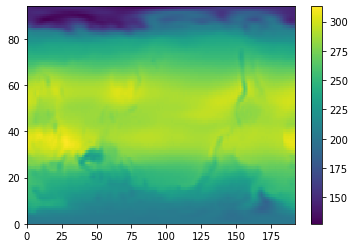

In [129]:
plt.pcolor(olr_raw_clr.mean(dim='time').csulf.values)
plt.colorbar()

In [132]:
clrs = olr_raw_clr.mean(dim='time').csulf.values

In [135]:
clrslong = clrs.reshape(18048)

(array([  8.,  21.,  30.,  38.,  44.,  41.,  76.,  61.,  84.,  95.,  86.,
         64.,  47.,  53.,  48.,  37.,  40.,  31.,  42.,  39.,  28.,  31.,
         42.,  19.,  22.,  24.,  31.,  31.,  36.,  61.,  56.,  60.,  74.,
         89.,  82.,  60.,  81.,  80., 128., 216., 407., 403., 257., 233.,
        207., 202., 180., 201., 165., 127., 162., 163., 144., 154., 130.,
        167., 186., 196., 252., 260., 258., 263., 280., 214., 287., 288.,
        300., 296., 246., 263., 217., 192., 237., 185., 209., 215., 188.,
        225., 174., 248., 218., 276., 337., 388., 560., 701., 991., 923.,
        818., 471., 344., 244., 174., 114.,  95.,  82.,  59.,  17.,  10.,
          9.]),
 array([127.44656, 129.30154, 131.15651, 133.01149, 134.86647, 136.72145,
        138.57642, 140.4314 , 142.28638, 144.14134, 145.99632, 147.8513 ,
        149.70628, 151.56125, 153.41623, 155.27121, 157.12619, 158.98116,
        160.83614, 162.69112, 164.54608, 166.40106, 168.25604, 170.11102,
        171.96599, 173

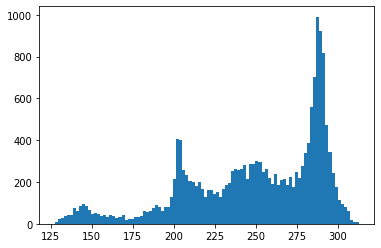

In [136]:
plt.hist(clrslong, bins=100)

(array([  8.,  27.,  28.,  31.,  59.,  39.,  79.,  83., 122.,  61.,  81.,
         48.,  42.,  53.,  34.,  53.,  54.,  38.,  60.,  52.,  33.,  44.,
         51.,  46.,  53.,  87.,  92., 131., 115., 145., 119., 189., 342.,
        621., 688., 414., 294., 290., 310., 272., 300., 267., 286., 297.,
        314., 356., 299., 317., 306., 279., 282., 242., 258., 281., 301.,
        279., 291., 279., 271., 281., 277., 283., 271., 252., 276., 278.,
        246., 292., 273., 290., 299., 285., 310., 304., 259., 261., 227.,
        208., 210., 169., 167., 141., 144., 122., 137., 130.,  96., 117.,
         94., 114., 107.,  48.,  35.,  28.,  26.,  37.,  27.,  14.,  12.,
          8.]),
 array([128.3496 , 130.1396 , 131.92961, 133.7196 , 135.50961, 137.29962,
        139.08963, 140.87964, 142.66963, 144.45964, 146.24965, 148.03966,
        149.82965, 151.61966, 153.40967, 155.19968, 156.98969, 158.77968,
        160.56969, 162.3597 , 164.1497 , 165.93971, 167.7297 , 169.51971,
        171.30972, 173

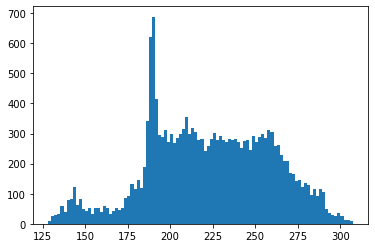

In [142]:
plt.hist(allslong, bins=100)

In [137]:
alls = olr_raw.mean(dim='time').ulwrf.values

In [140]:
allslong = alls.reshape(18048)

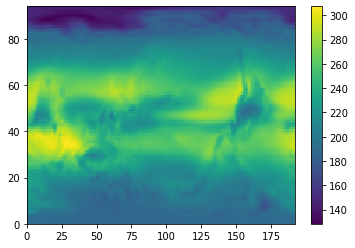

In [130]:
plt.pcolor(olr_raw.mean(dim='time').ulwrf.values)
plt.colorbar()